In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

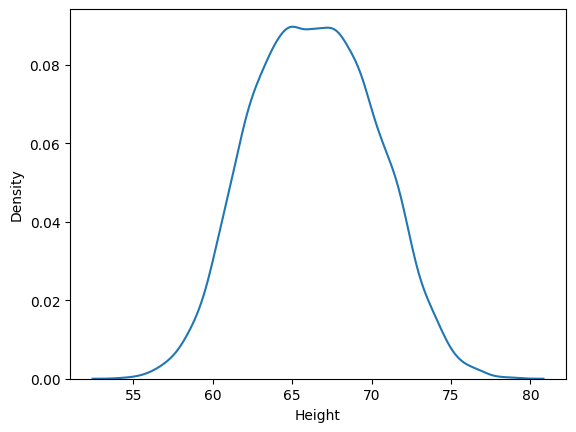

In [5]:
sns.kdeplot(df['Height'])
plt.show()

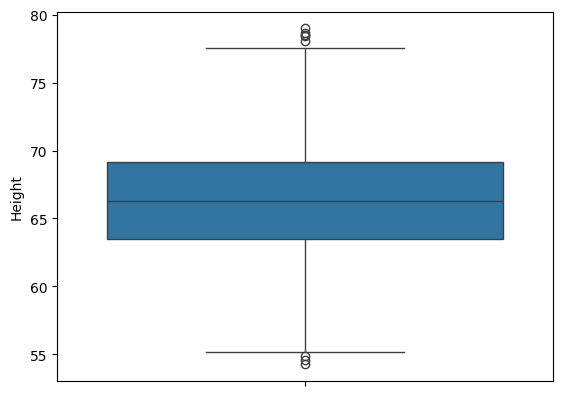

In [6]:
sns.boxplot(df['Height'])
plt.show()

In [7]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)
print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

Upper Limit: 74.7857900583366
Lower Limit: 58.13441158671655


In [8]:
df[(df['Height'] >= 74.78) | (df['Height'] <= 58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


### Trimming

In [9]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]
new_df.shape

(9799, 3)

In [10]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

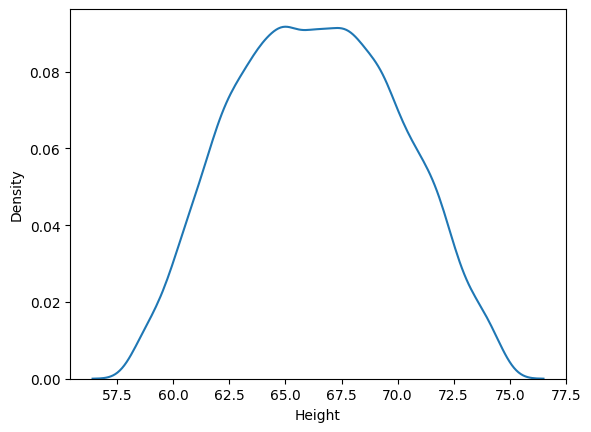

In [11]:
sns.kdeplot(new_df['Height'])
plt.show()

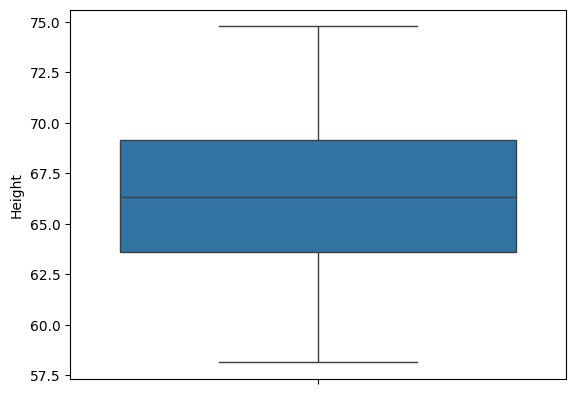

In [12]:
sns.boxplot(new_df['Height'])
plt.show()

### Capping --> Winsorization

In [13]:
df['Height'] = np.where(df['Height'] >= upper_limit, upper_limit,
        np.where(df['Height'] <= lower_limit, lower_limit,
         df['Height']))

In [14]:
df.shape

(10000, 3)

In [15]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

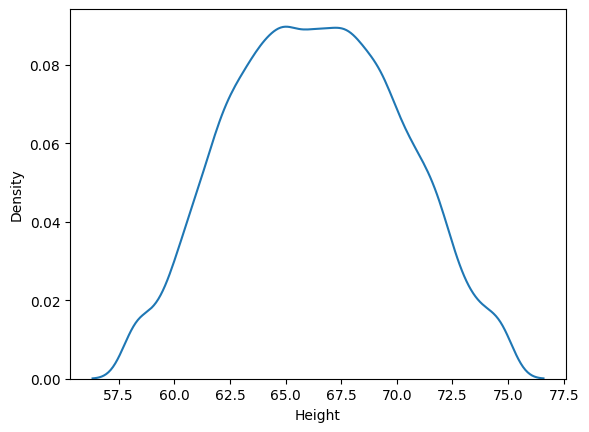

In [16]:
sns.kdeplot(df['Height'])
plt.show()

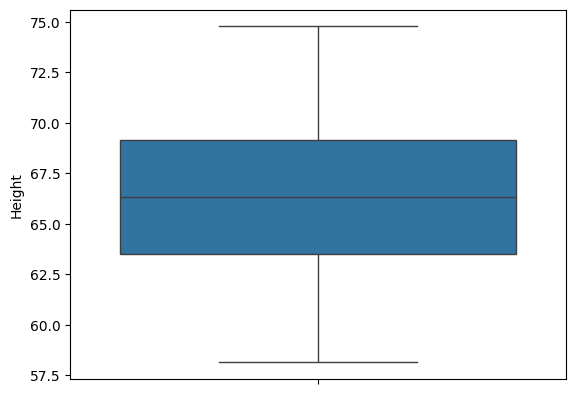

In [17]:
sns.boxplot(df['Height'])
plt.show()